# Exam 2019 - solutions

## Question 1


### (a) **definition of a Normal form game**:

An \\(N\\) player normal form game consists of:

- A finite set of $N$ players
- Strategy spaces for the players: $\{S_1,S_2,S_3,\dots,S_N\}$;
- Payoff functions for the players: $u_i:S_1\times S_2\dots\times S_N\to\mathbb{R}$

[2]

### (b) **Identifying best responses**

We have:

- $u_r((1, 0), (y, 1-y))= 30y + 6 (1 - y)=24y+6$ and $u_r((0, 1), (y, 1-y))= 12y + 30(1 - y)=30-18y$
- $u_c((x, 1 - x), (1, 0))=12x+42(1-x)=42-30x$ and $u_c((x, 1- x), (0, 1))=30x+12(1-x)=18x+12$

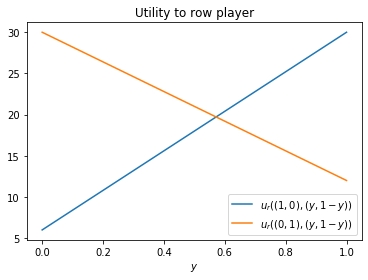

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure()
ys = [0, 1]
plt.plot(ys, [30 * y + 6 * (1 - y) for y in ys], label="$u_r((1, 0), (y, 1-y))$")
plt.plot(ys, [12 * y + 30 * (1 - y) for y in ys], label="$u_r((0, 1), (y, 1-y))$")
plt.legend()
plt.xlabel("$y$")
plt.title("Utility to row player");

[1]

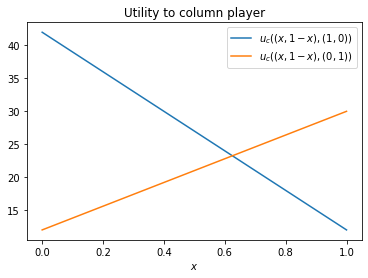

In [2]:
plt.figure()
xs = [0, 1]
plt.plot(xs, [12 * x + 42 * (1 - x) for x in xs], label="$u_c((x, 1 - x), (1, 0))$")
plt.plot(xs, [30 * x + 12 * (1 - x) for x in xs], label="$u_c((x, 1 - x), (0, 1))$")
plt.legend()
plt.xlabel("$x$")
plt.title("Utility to column player");

The points of intersection:

For the row player:

In [3]:
import sympy as sym
x, y = sym.symbols('x, y')

sym.solveset(sym.Eq(24 * y + 6, 30 - 18 * y), y)

{4/7}

For the column player:

In [4]:
sym.solveset(sym.Eq(42 - 30 * x, 18 * x + 12), x)

{5/8}

[1]

The best responses are then given by:

$$
\sigma_r^* = \begin{cases}
(0,1)&\text{ if }y< 4/7\\
(1,0)&\text{ if }y> 4/7\\
\text{indifferent}&\text{ otherwise}
\end{cases}
$$

$$
\sigma_c^* = \begin{cases}
(1,0)&\text{ if }x< 5/8\\
(0,1)&\text{ if }x> 5/8\\
\text{indifferent}&\text{ otherwise}
\end{cases}
$$

[1]

### **(c) Considering a third strategy**


$u_c((x, 1 - x), (0, 0, 1))=22x+6(1-x)=6+15x$

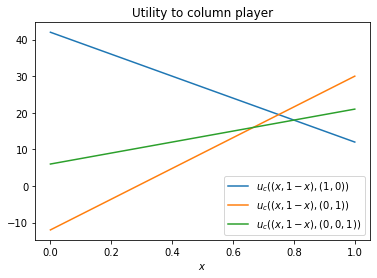

In [5]:
plt.figure()
xs = [0, 1]
plt.plot(xs, [12 * x + 42 * (1 - x) for x in xs], label="$u_c((x, 1 - x), (1, 0))$")
plt.plot(xs, [30 * x - 12 * (1 - x) for x in xs], label="$u_c((x, 1 - x), (0, 1))$")
plt.plot(xs, [15 * x + 6 for x in xs], label="$u_c((x, 1 - x), (0, 0, 1))$")
plt.legend()
plt.xlabel("$x$")
plt.title("Utility to column player");

[2]

We see that the third column is never a best response and so the best responses remain unchanged.

[4]


### (d) Definition of best response polytope

For a two player game $(A, B)\in{\mathbb{R}^{m\times n}_{>0}}^2$ the row/column player best response polytope $\mathcal{P}$/$\mathcal{Q}$ is defined by:

$$
\mathcal{P} = \left\{x\in\mathbb{R}^{m}\;|\;x\geq 0; xB\leq 1\right\}
$$

$$
\mathcal{Q} = \left\{y\in\mathbb{R}^{n}\;|\; Ay\leq 1; y\geq 0 \right\}
$$

[2]

### (e) The Lemke-Howson algorithm

For a nondegenerate 2 player game $(A, B)\in{\mathbb{R}^{m\times n}_{>0}}^2$ the following algorithm returns a nash equilibrium:

1. Start at the artificial equilibrium: $(0, 0)$
2. Choose a label to drop.
3. Remove this label from the corresponding vertex by traversing an edge of the corresponding polytope to another vertex. 
4. The new vertex will now have a duplicate label in the other polytope. Remove this label from the vertex of the other polytope and traverse an edge of that polytope to another vertex.
5. Repeat step 4 until the pair of vertices is fully labelled.

[4]


### (f) Using the Lemke-Howson algorithm

The following is code used to carry out the various pivoting operations (students would do this by hand).

In [6]:
import numpy as np
import nashpy as nash
row_tableau = np.array([[12, 42, 1, 0, 0, 1],
                        [30, 12,  0, 1, 0, 1],
                        [23, 7,  0, 0, 1, 1]])
col_tableau = np.array([[1, 0, 30, 6, 36, 1],
                        [0, 1, 12, 30, 18, 1]])



Let us drop label 0:

In [7]:
dropped_label = nash.integer_pivoting.pivot_tableau(row_tableau, column_index=0)
row_tableau

array([[   0, 1116,   30,  -12,    0,   18],
       [  30,   12,    0,    1,    0,    1],
       [   0,  -66,    0,  -23,   30,    7]])

We have picked up label 3, let us drop label 3 from the column tableau:

In [8]:
dropped_label = nash.integer_pivoting.pivot_tableau(col_tableau, column_index=3)
col_tableau

array([[ 30,  -6, 828,   0, 972,  24],
       [  0,   1,  12,  30,  18,   1]])

We have picked up label 1, let us drop label 1 from the row tableau:

In [9]:
dropped_label = nash.integer_pivoting.pivot_tableau(row_tableau, column_index=1)
row_tableau

array([[     0,   1116,     30,    -12,      0,     18],
       [ 33480,      0,   -360,   1260,      0,    900],
       [     0,      0,   1980, -26460,  33480,   9000]])

We have picked up label 2 so let us drop label 2 from the col tableau:

In [10]:
dropped_label = nash.integer_pivoting.pivot_tableau(col_tableau, column_index=2)
col_tableau

array([[   30,    -6,   828,     0,   972,    24],
       [ -360,   900,     0, 24840,  3240,   540]])

The row tableau has labels: $\{2, 3\}$ and the column tableau has labels: $\{0, 1, 4\}$ thus we have a fully labeled vertex pair.

The vertex pairs are given by:

\\[
    \left((900/33480, 18/1116), (24/828, 540/24840, 0)\right)
\\]

which gives Nash equilibria:

\\[
    \left((5/8, 3/8), (4/7, 3/7, 0)\right)
\\]

[7]

This confirms the previous result as this corresponds to a pair of best response.

[1]

Some code to confirm the numeric calculations:

In [11]:
A = np.array([[30, 6, 36], [12, 30, 18]])
B = np.array([[12, 30, 22], [42, 12, 6]])
game = nash.Game(A, B)
game.lemke_howson(initial_dropped_label=0)

(array([0.625, 0.375]), array([0.57142857, 0.42857143, 0.        ]))

##  Question 2

### (a) Definition of repeated game

Given a two player game $(A,B)\in{\mathbb{R}^{m\times n}}^2$, referred to as a **stage** game, a $T$-stage repeated game is a game in which players play that stage game for $T > 0$ periods. Players make decisions based on the full history of play over all the periods.

[2]

### (b) Definition of a strategy in a repeated game

Given a two player stage game $(A,B)\in{\mathbb{R}^{m\times n}}^2$, repeated to give a $T$-stage repeated game. A strategy is a mapping from the entire history of play to an action of the stage game:

$$
\bigcup_{t=0}^{T-1}H(t)\to a
$$

where:

- $H(t)$ is the history of player of **both** players up until stage $t$ ($H(0)=(\emptyset, \emptyset)$)
- $a$ is an action (for either player) of the **stage** game

[2]


### (c) Listing strategy spaces

$S_1\{r_1, r_2\}$, $S_2=\{c_1, c_2, c_3\}$ and $T=2$
      
$$\{(\emptyset, \emptyset), (r_1, c_1), (r_1, c_2), (r_1, c_3), (r_2, c_1), (r_2, c_2), (r_2, c_3)\}$$
      
[3]



### **(d) Pure Nash equilibria**

The pure Nash equilibria:


$$A = \begin{pmatrix}\underline{1} & \underline{4} & \underline{-1}\\-1 & 0 & -2\\\end{pmatrix}
\qquad
B = \begin{pmatrix}-2 & \underline{5} & \underline{5}\\\underline{18} & -1 & -2\\\end{pmatrix}$$

Thus, for our example we have the four Nash equilibria:

- $(r_1r_1, c_2c_2)$ with utility: (8, 10). [1]
- $(r_1r_1, c_2c_3)$ with utility: (3, 10). [1]
- $(r_1r_1, c_3c_2)$ with utility: (3, 10). [1]
- $(r_1r_1, c_3c_3)$ with utility: (-2, 10). [1]

### **(g) Not stage Nash, equilibria**

Consider the following two strategies:

1. For the row player:

   $$(\emptyset, \emptyset) \to r_2$$
   $$(r_2, c_1) \to r_1$$
   $$(r_2, c_2) \to r_1$$
   $$(r_2, c_3) \to r_1$$
   
   [2]
   
2. For the column player:

   $$(\emptyset, \emptyset) \to c_1$$
   $$(r_1, c_1) \to c_3$$
   $$(r_2, c_1) \to c_2$$
   
   [2]

This is a Nash equilibria because:

1. If the row player deviates, they would only be rational to do so in the first stage, if they did they would gain 2 in that stage but lose 5 in the second stage. Thus they have no incentive to deviate.
2. If the column player deviates, they would only do so in the first stage and gain no utility.

[1]

### (f) The Centipede game transformed to a normal form game

According to the definition of a repeated game, the strategy spaces for both players is:

\\[
    S_1 = S_2 = \{CC, CS, SC, SS\}
\\]

[3]

Using S for "stop" and "C" for continue, where the first letter corresponds to what the player will do at their first decision and the second letter corresponds to what the player will do at their second decision.

Using this, and reading from the diagram, the payoff matrix is obtained.

[3]

### (g) Pure Nash equibria:

\\[A =                                                                                                                               
          \begin{pmatrix}                                                                                                            
              \underline{4} & 3 & 1 & 1\\                                                                                                        
              \underline{4} & 4 & 1 & 1\\                                                                                                        
              2 & 2 & \underline{2} & \underline{2}\\                                                                                                        
              2 & 2 & \underline{2} & \underline{2}\\                                                                                                        
          \end{pmatrix}                                                                                                              
          \qquad                                                                                                                     
          B =                                                                                                                        
          \begin{pmatrix}                                                                                                            
              4 & \underline{5} & 3 & 3\\                                                                                                        
              2 & 2 & \underline{3} & \underline{3}\\                                                                                                        
              \underline{0} & \underline{0} & \underline{0} & \underline{0}\\                                                                                                        
              \underline{0} & \underline{0} & \underline{0} & \underline{0}\\                                                                                                        
          \end{pmatrix}                                                                                                              
\\]                   

There are 4 pure Nash equilibria:

\\[\{(SC, SC), (SC, SS), (SS, SC), (SS, SS)\}\\]

which all imply that both players stop the game at their first opportunity.

[3]

##  Question 3

### (a) Definition of a Prisoner's Dilemma (bookwork)

$$
A =
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}\qquad
B =
\begin{pmatrix}
    R & T\\
    S & P
\end{pmatrix}
$$

with the following constraints:

$$T > R > P > S$$
$$2R > T + S$$

[2]

### (b) Finding valid Prisoner's Dilemmas

(i) 

For $A, B$ to be valid we need:

$$
\begin{pmatrix}
    3 & S\\
    6 & 1
\end{pmatrix}
=
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}
$$

which gives: $R=3, T=6$

furthermore:

$$
\begin{pmatrix}
    3 & T\\
    -1 & 1
\end{pmatrix}
=
\begin{pmatrix}
    R & T\\
    S & P
\end{pmatrix}
$$

[2]

which gives: $R=3, S=-1$

Thus we have (R, S, P, T) = (3, -1, 1, 6) which also follows the two required inequalities:

$$T > R > P > S \Leftrightarrow 6 > 3 > 1 > -1$$
$$2R > T + S \Leftrightarrow 6 > 5$$

[2]

(ii) 

For $A, B$ to be valid we need:

$$
\begin{pmatrix}
    2 & S\\
    -2 & 1
\end{pmatrix}
=
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}
$$

which gives: $R=2, T=-2, P=1$ 

We immediately see that $R > T$ so this cannot be a Prisoner's Dilemma.

[4]


### (c) Different form of PD

For $A, B$ to be valid we need:

$$
\begin{pmatrix}
    b - c & c\\
    b     & 1
\end{pmatrix}
=
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}
$$

thus \\(P=1\\), \\(S=c\\), \\(T=b\\), \\(R=b-c\\). The constraints imply: [1]

- \\(T > R\\): \\(c > 0\\) [1]
- \\(R > P\\): \\(b > c\\) [1]
- \\(P > S\\): \\(c < 1\\) [1]
- \\(2R > T + S\\): \\(b > 3c\\) [1]


### (d) Modified formula for reactive players

A theorem from the notes states the steady state probabilities of being in states \\((CC, CD, DC, DD)\\) is given by:

$$
\pi=(s_1s_2, s_1(1-s_2), (1-s_1)s_2, (1-s_1)(1-s_2))
$$

Using this with the new utilities gives the result immediately.

[3]

### (e) Computing specific case

For \((b, c)=(2, 1/2)\), the given formula is:

\\[
   s_1s_2\times 3/2 +  s1(1-s_2)/2 +  (1-s_1)s_2 \times 2 + (1-s_1)(1-s_2)
\\]

which gives:

\\[
    3s_1s_2/2 +  s1/2-s_1s_2/2 +  2s_2 - 2s_1s_2 + 1 -s_1 - s_2 + s_1s_2 = s_1s_2(3/2-1/2 - 2 + 1) + s_1(1/2-1) + s_2(2-1) + 1 
\\]

which corresponds to:

\\[
u = s_2 - s_1 / 2 + 1
\\]

[3]

In [12]:
s = sym.symbols("s:2")

expr = s[0] * s[1] * sym.S(3) / 2 + s[0] * (1 - s[1]) / 2 + (1 - s[0]) * s[1] * 2 + (1 - s[0]) * (1 - s[1])
expr.expand()

-s0/2 + s1 + 1

If \\(q_1=q_2\\) then:

\\[
    r_2 = 0 \Rightarrow s_1=q_2r_1+p_1 \text{ and }s_2=q_2
\\]

[1]

thus the utility is given by:

\\[
    - q_2r_1/2 - p_2/2+ q_2 + 1
\\]

[1]

This is maximised when the first two terms are 0, the player in question controls \\(r_1=p_1 - p_2\\) and \\(p_2\\) thus \\(p_1 = p_2 = 0\\) is optimal behaviour. 

This can also be seen intuitevly, if an opponent is playing independently of our actions then we should always defect.

[2]

## Question 4

### (a) Defining equations (bookwork)

The matrix $A$ correspods to the utility of a row player in a game where the row player is a given individual and the column player is the population.

This gives:

$$f_1=ax_1+bx_2\qquad f_2=cx_1+dx_2$$

[1]

or equivalently:

$$f=Ax\qquad \phi=fx$$

thus we have the same equation as before but in matrix notation:

$$\frac{dx}{dt}=x(f-\phi)$$

[1]

### (b) Defining mutated population (bookwork)


Given a strategy vector $x=(x_1, x_2)$, some $\epsilon>0$ and another strategy $y=(y_1, y_1)$, the post entry population $x_{\epsilon}$ is given by:

$$
x_{\epsilon} = (x_1 + \epsilon(y_1 - x_1), x_2 + \epsilon(y_2 - x_2))
$$

[2]

### (c) Defining an evolutionary stable strategy (bookwork)

Given a stable population distribution, $x$ it represents an **Evolutionary Stable Strategy** (ESS) if and only if there exists $\bar\epsilon>0$:

$$u(x, x_{\epsilon})>u(y, x_{\epsilon})\text{ for all }0<\epsilon<\bar\epsilon, y$$

[1]

where $u(x, y)$ corresponds to the fitness of strategy $x$ in population $y$ which is given by:

$$xAy^T$$

[1]

### (d) Proof of result for ESS (bookwork)

**Theorem:**

If $x$ is an ESS, then for all $y\ne x$, either:

1. $u(x,x)>u(y,x)$
2. $u(x,x)=u(y,x)$ and $u(x,y)>u(y,y)$
---


Conversely, if either (1) or (2) holds for all $y\ne x$ then $x$ is an ESS.


[2]

---

**Proof:**

---

If $x$ is an ESS, then by definition:

$$u(x,x_{\epsilon})>u(y,x_{\epsilon})$$

which corresponds to:

$$(1-\epsilon)u(x,x)+\epsilon u(x,y)>(1-\epsilon)u(y,x)+\epsilon u(y,y)$$

- If condition 1 of the theorem holds then the above inequality can be satisfied for \\(\epsilon\\) sufficiently small. If condition 2 holds then the inequality is satisfied.
- Conversely:

    - If $u(x,x) < u(y,x)$ then we can find $\epsilon$ sufficiently small such that the inequality is violated. [1]

    - If $u(x, x) = u(y,x)$ and $u(x,y) \leq u(y,y)$ then the inequality is violated. [1]
    
    
### (e) Obtain all ESS for a 2 by 2 game

First step is to identify the Nash equilibria. Identify best responses for the associated two player game $(A, A^T)$:

$$
A=\begin{pmatrix}
\underline{2}&\underline{3}\\
0&1
\end{pmatrix}\qquad
A^T=\begin{pmatrix}
\underline{2}&0\\
\underline{3}&1
\end{pmatrix}
$$

[1]

This immediately gives a single symmetric pure Nash equilibria (as the first strategy dominates the second this is the only Nash equilibria):

$$
(\sigma_r, \sigma_c) = ((1, 0), (1, 0))
$$

some code to verify this:

In [13]:
A = np.array([[2, 3], [0, 1]])
game = nash.Game(A, A.transpose())
list(game.support_enumeration())

[(array([1., 0.]), array([1., 0.]))]

as this strategy obeys the first condition of the theorem it is the evolutionary stable strategy.

[4]

### (f) Discussing the research paper

- (i) This paper looks at GT and cancer: it is a proof of concept sitting in literature that already exists on the subject. The main result is confirming intuitive understanding of proliferation/motility. Increased nutrients implies less motility. This is done in two ways: a theoretic game and a simulation. [3]
- (ii) The game matrix should in fact be: $\begin{pmatrix}b/2 & b - c\\ b & b - c / 2\end{pmatrix}$ [2]
- (iii) The theorem is used in the paper, although it is not done explicitly it is used to implictely describe the stability of the equilibria. [2]
- (iv) Another approach would be to use a Moran process. The main difference with the approach in the paper would be to use a Moran process. This would correspond to considering a finite population size as opposed to the infinite population model used. This would correspond more closely to the simulation model used in the paper. [3]